In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### What is the overall survival rate of passengers on the Titanic?

In [6]:
total_passengers = df.shape[0]
survived_passengers = df[df['survived'] == 1].shape[0]
survival_rate = (survived_passengers / total_passengers) * 100
print(f"The overall survival rate of passengers on the Titanic is: {survival_rate:.2f}%")


The overall survival rate of passengers on the Titanic is: 38.38%


### How does the survival rate differ between male and female passengers?

In [7]:
survival_rate_by_gender = df.groupby('sex')['survived'].mean() * 100
print("Survival Rate by Gender:")
print(survival_rate_by_gender)


Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


### What is the distribution of passenger ages on the Titanic?

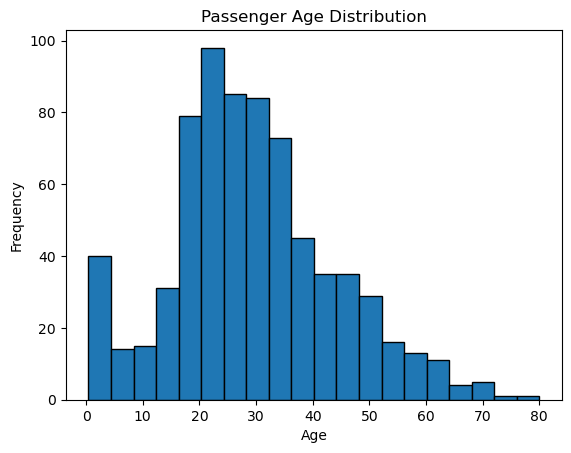

In [8]:
df_cleaned = df.dropna(subset=['age'])
plt.hist(df_cleaned['age'], bins=20, edgecolor='black')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Are there any significant differences in survival rates among different passenger classes (pclass)?

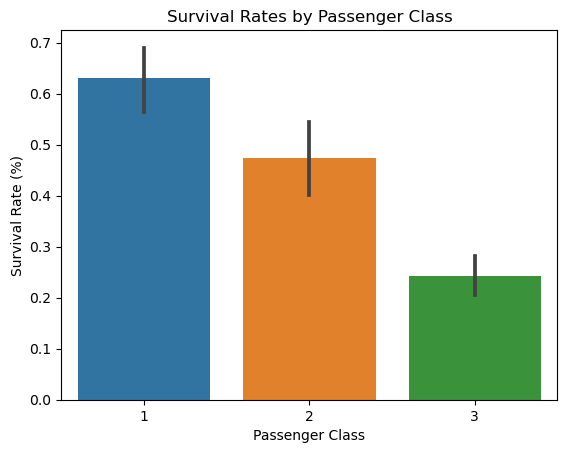

In [9]:
survival_rate_by_class = df.groupby('pclass')['survived'].mean() * 100
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()


### Did passengers who traveled alone have a higher survival rate compared to those with family members (sibsp and parch)?

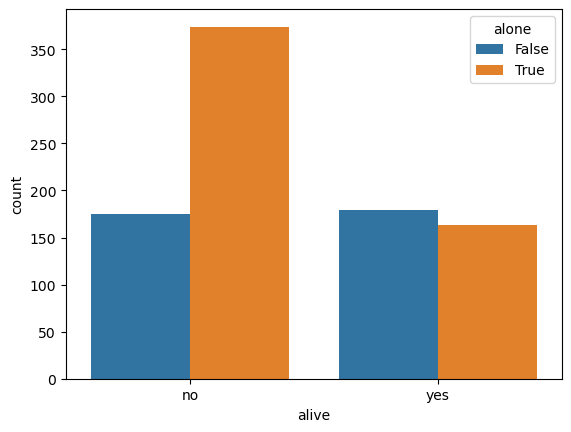

In [17]:
#another method
sns.countplot(data=df,x='alive', hue='alone')
plt.show()

In [14]:
df['family_size'] = df['sibsp'] + df['parch']


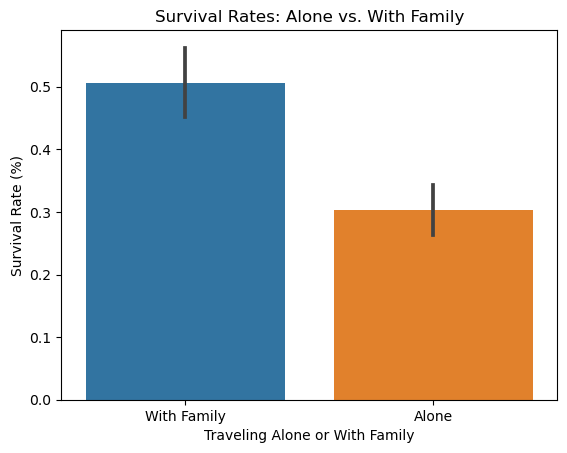

In [18]:
def is_traveling_alone(family_size):
    if family_size == 0:
        return 'Alone'
    else:
        return 'With Family'
df['alone_or_family'] = df['family_size'].apply(is_traveling_alone)

survival_rate_by_alone_or_family = df.groupby('alone_or_family')['survived'].mean() * 100

sns.barplot(x='alone_or_family', y='survived', data=df)
plt.title('Survival Rates: Alone vs. With Family')
plt.xlabel('Traveling Alone or With Family')
plt.ylabel('Survival Rate (%)')
plt.show()


### Which embarkation point (embarked or embark_town) had the highest and lowest survival rates?

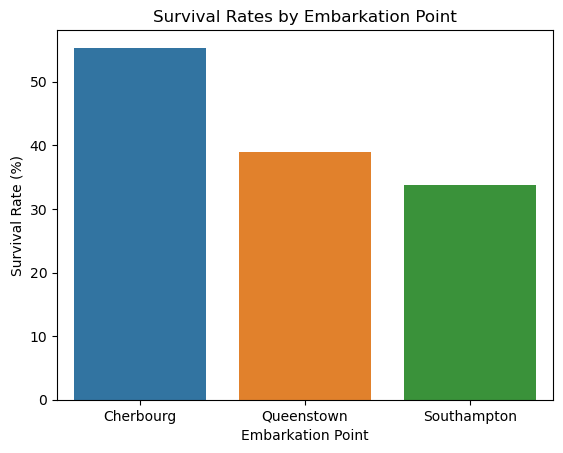

In [19]:
survival_rate_by_embarkation = df.groupby(['embarked', 'embark_town'])['survived'].mean() * 100

survival_rate_by_embarkation = survival_rate_by_embarkation.reset_index()

sns.barplot(x='embark_town', y='survived', data=survival_rate_by_embarkation)
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate (%)')
plt.show()


### Were there any notable differences in survival rates based on the deck where passengers stayed?

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,alone_or_family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,With Family
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,With Family
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,Alone
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,With Family
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,Alone
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,Alone
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3,With Family
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,Alone


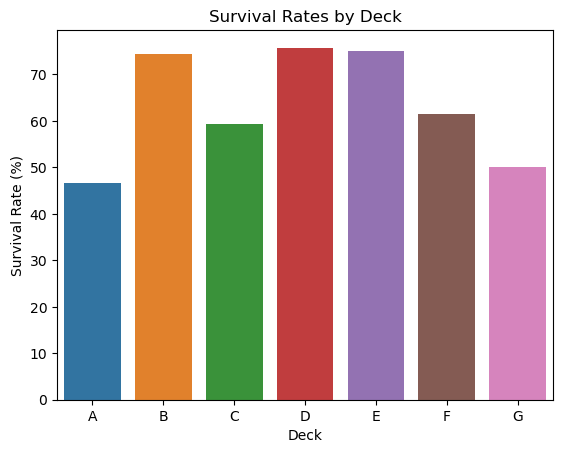

In [22]:
df['deck'] = df['deck'].str.slice(0, 1)

survival_rate_by_deck = df.groupby('deck')['survived'].mean() * 100


survival_rate_by_deck = survival_rate_by_deck.reset_index()


sns.barplot(x='deck', y='survived', data=survival_rate_by_deck)
plt.title('Survival Rates by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate (%)')
plt.show()


### How does the survival rate vary among different age groups (e.g., children, adults, elderly)?

In [23]:
age_groups = [0, 18, 60, df['age'].max()]
age_labels = ['Children', 'Adults', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=age_groups, labels=age_labels, right=False)


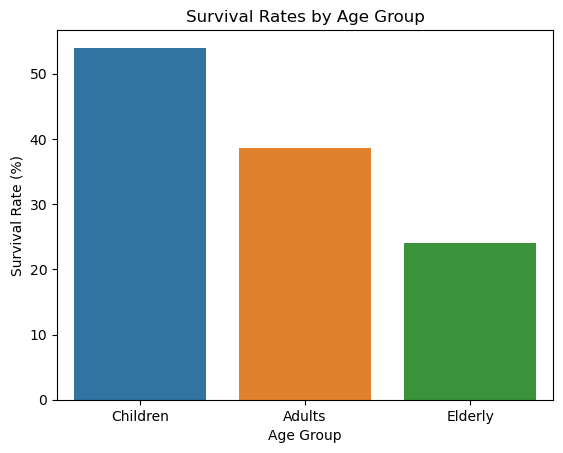

In [24]:
survival_rate_by_age_group = df.groupby('age_group')['survived'].mean() * 100

survival_rate_by_age_group = survival_rate_by_age_group.reset_index()

sns.barplot(x='age_group', y='survived', data=survival_rate_by_age_group)
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()


### Are there any relationships between survival and other variables, such as passenger class (class), gender (who), or whether they were adults or males (adult_male)?

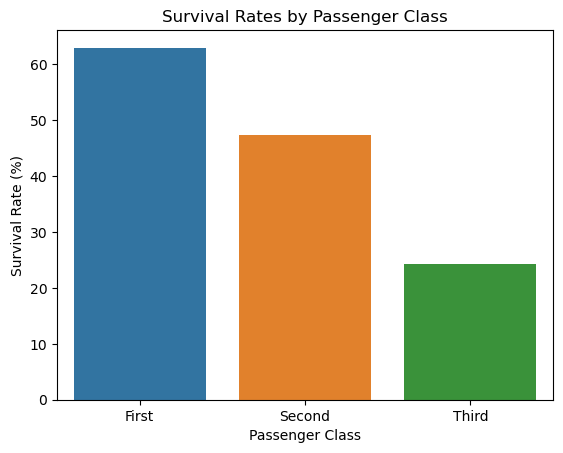

In [25]:

survival_rate_by_class = df.groupby('class')['survived'].mean() * 100


survival_rate_by_class = survival_rate_by_class.reset_index()


sns.barplot(x='class', y='survived', data=survival_rate_by_class)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()
